<a href="https://colab.research.google.com/github/aghapygad336/MENA/blob/master/MENA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/My Drive/MENA/golbal.csv',encoding = "ISO-8859-1", engine = 'python', usecols=[1,2,3,8,10,19,20,21,22,26,27,29,35,41,71,84,100,101,103,135])
print(data.shape)
dataLabels=np.array(data.columns)
print(dataLabels)


(181691, 19)
['iyear' 'imonth' 'iday' 'country_txt' 'region_txt' 'crit1' 'crit2'
 'crit3' 'doubtterr' 'success' 'suicide' 'attacktype1_txt' 'targtype1_txt'
 'natlty1_txt' 'claimed' 'weapsubtype1_txt' 'nkillter' 'nwound' 'nwoundte']


In [0]:
data_C=data.shape[1]
data_R=data.shape[0]


In [0]:
data_C=data.shape[1]
data_R=data.shape[0]
for c in range(data_C):
    Region_nums=[]
    Region_nums=data[dataLabels[c]].unique()
    Region_nums={Region_nums[i]: i for i in range(len(Region_nums))}
    Regions = Region_nums
    data[dataLabels[c]].replace(Regions, inplace=True)


Explained Variance: [6.34597600e-01 2.29476985e-01 4.52070439e-02 3.76916767e-02
 2.36498964e-02 1.51529103e-02 5.48016009e-03 3.67709052e-03
 2.00280023e-03 1.90491151e-03 6.16658411e-04 2.67229507e-04
 1.73698541e-04 5.20840145e-05 2.68818763e-05 1.01386837e-05
 8.15192100e-06 2.63251765e-06 1.44970991e-06]
(19, 19)


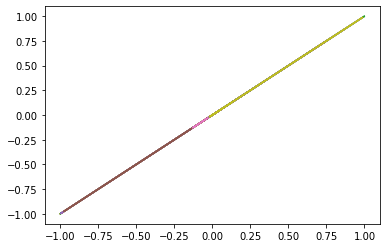

In [16]:
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

preprocessedData = np.asarray(data)
preprocessedData.shape
pca = PCA(n_components=19)
fit = pca.fit(preprocessedData)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
import matplotlib.pyplot as plt
import numpy as np
x=fit.components_
print(x.shape)
plt.plot(x, x)
plt.show()
